# First look at ProRail data

In [14]:
# imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
import warnings
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
storing_csv = pd.read_csv("sap_storing_data_hu_project.csv", index_col=0)
df = pd.DataFrame(storing_csv)
df.head()

/tmp/ipykernel_67087/2637174966.py:1: DtypeWarning: Columns (0,11,19,21,24,25,27,32,33,36,37,38,39,40,46,47,48,49,51,53,55,56,60,73,75,78,80,82,83,86,87,91,95,99,102,103,104,107,108,109,110,111,112,113,116,118,119,120,121,122,123,124,129) have mixed types. Specify dtype option on import or set low_memory=False.
  storing_csv = pd.read_csv("sap_storing_data_hu_project.csv", index_col=0)


,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_mon_meld_ddt,stm_sap_meldtekst_lang,stm_mon_begin_ddt,stm_sap_meldtekst,stm_mon_toelichting_trdl,stm_oh_pg_mld,...,stm_rapportage_maand,stm_rapportage_jaar,stm_x_bron_publ_dt,stm_x_bron_bestandsnaam,stm_x_bron_arch_dt,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_start_sessie_dt,stm_x_vervallen_ind
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2014,07/05/2014 05:30:12,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,34415,3617016,07/05/2014 05:44:24,0
1,50053211,0.0,NaN,02/01/2006 09:00:00,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,NaN,Logboeknr Geeltje : 49 Tijd: 0900,NaN,NaN,...,1,2006,02/01/2006 09:00:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704590,13/06/2013 13:37:52,0
2,50053213,48.0,GN,02/01/2006 12:35:00,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-P,NaN,NaN,...,1,2006,02/01/2006 12:35:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704591,13/06/2013 13:37:52,0
3,50053214,72.0,ZL,02/01/2006 16:40:00,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-P,NaN,NaN,...,1,2006,02/01/2006 16:40:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704592,13/06/2013 13:37:52,0
4,50053215,96.0,ZL,02/01/2006 22:30:00,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-P,NaN,NaN,...,1,2006,02/01/2006 22:30:00,\\PUHAPS0149\Informatica_Prod\Inbox\Informatic...,31/12/9999 00:00:00,1,1518,12704593,13/06/2013 13:37:52,0


In [3]:
df = df[[
 '#stm_sap_meldnr',
 'stm_mon_nr',
 'stm_vl_post',
 'stm_sap_meld_ddt',
 'stm_sap_meldtekst_lang',
 'stm_sap_meldtekst',
 'stm_geo_mld',
 'stm_geo_mld_uit_functiepl',
 'stm_equipm_nr_mld',
 'stm_equipm_soort_mld',
 'stm_equipm_omschr_mld',
 'stm_km_van_mld',
 'stm_km_tot_mld',
 'stm_prioriteit',
 'stm_status_melding_sap',
 'stm_aanngeb_ddt',
 'stm_oh_pg_gst',
 'stm_geo_gst',
 'stm_geo_gst_uit_functiepl',
 'stm_equipm_nr_gst',
 'stm_equipm_soort_gst',
 'stm_equipm_omschr_gst',
 'stm_km_van_gst',
 'stm_km_tot_gst',
 'stm_oorz_groep',
 'stm_oorz_code',
 'stm_oorz_tkst',
 'stm_fh_ddt',
 'stm_fh_status',
 'stm_sap_storeind_ddt',
 'stm_tao_indicator',
 'stm_tao_indicator_vorige',
 'stm_tao_soort_mutatie',
 'stm_tao_telling_mutatie',
 'stm_tao_beinvloedbaar_indicator',
 'stm_evb',
 'stm_sap_melddatum',
 'stm_sap_meldtijd',
 'stm_contractgeb_mld',
 'stm_functiepl_mld',
 'stm_techn_mld',
 'stm_contractgeb_gst',
 'stm_functiepl_gst',
 'stm_techn_gst',
 'stm_aanngeb_dd',
 'stm_aanngeb_tijd',
 'stm_aanntpl_dd',
 'stm_aanntpl_tijd',
 'stm_arbeid',
 'stm_progfh_in_datum',
 'stm_progfh_in_tijd',
 'stm_progfh_in_invoer_dat',
 'stm_progfh_in_invoer_tijd',
 'stm_progfh_in_duur',
 'stm_progfh_gw_tijd',
 'stm_progfh_gw_lwd_datum',
 'stm_progfh_gw_lwd_tijd',
 'stm_progfh_gw_duur',
 'stm_progfh_gw_teller',
 'stm_afspr_aanvangdd',
 'stm_afspr_aanvangtijd',
 'stm_fh_dd',
 'stm_fh_tijd',
 'stm_fh_duur',
 'stm_reactie_duur',
 'stm_sap_storeinddatum',
 'stm_sap_storeindtijd',
 'stm_oorz_tekst_kort',
 'stm_pplg_van',
 'stm_pplg_naar',
 'stm_dstrglp_van',
 'stm_dstrglp_naar']]

In [4]:
df.sample(20)

,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,...,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
367243,80525403,652435.0,AH,09/10/2009 10:13:00,Va-Dr.P sein 764 met stop/door bediend kwam p...,Va-Dr.P sein 764 met stop/door bediend k,34,34.0,10545371.0,SEIN,...,14:40:00,267.0,2.170000e+02,09/10/2009,14:40:00,Het onderzoek heeft geen afwijkingen aan,DR,NaN,RH,DR
75638,50135952,3078469.0,EHV,13/05/2015 09:02:00,Tbr-Tbu : Km 15.8 - 18.3 spoorloper,Tbr-Tbu : Km 15.8 - 18.3 spoorloper,123.0,123.0,NaN,NaN,...,00:00:00,0.0,1.000000e+08,NaN,00:00:00,Geen OBI-melding,TBU,NaN,TBR,TBU
49299,50124158,2254981.0,RSD,08/11/2013 15:10:00,Bdpb : Op perron 1 verdacht persoon. Mcn 1950...,Bdpb : Op perron 1 verdacht persoon. Mcn,121.0,121.0,NaN,NaN,...,00:00:00,0.0,1.000000e+08,NaN,00:00:00,Status gewijzigd van Concept naar Compl,NaN,BDA,BDPB,00/00/0000
86498,50141856,3508918.0,EHV,01/02/2016 18:02:00,Ck-Mmlh : Km 27.3 - 27.4 spoorloper.,Ck-Mmlh : Km 27.3 - 27.4 spoorloper.,49.0,49.0,NaN,NaN,...,00:00:00,0.0,0.000000e+00,NaN,00:00:00,Geen OBI-melding,CK,NaN,CK,MMLH
770256,80845502,0.0,NaN,23/04/2016 15:03:39,Ut : Kan niet in Harm komen.,Ut : Kan niet in Harm komen.,531,531.0,11241220.0,ICTINFRA,...,15:27:47,24.0,1.059953e+09,23/04/2016,15:29:52,Gebruikersaccount is vrijgegeven in HARM,NaN,NaN,NaN,NaN
273443,80407916,0.0,NaN,15/05/2007 14:29:00,"Ndb: Infoplus spoor 2 Hvs zijde, bak is stukg...","Ndb: Infoplus spoor 2 Hvs zijde, bak is",506.0,506.0,10721407.0,VISUELERIS,...,14:47:00,18.0,8.000000e+00,15/05/2007,14:48:00,NaN,NaN,NaN,NaN,NaN
402580,80569209,0.0,NaN,16/07/2010 02:26:00,"Ac : Aquaduct pompen gestoord, aanvangdienst ...","Ac : Aquaduct pompen gestoord, aanvangdi",80,80.0,10935467.0,AQUADUCT,...,20:15:00,1069.0,3.490000e+02,19/07/2010,11:00:00,NaN,NaN,NaN,NaN,NaN
887326,80920627,0.0,NaN,23/09/2018 03:09:31,Rm : Assistentie en toegang verlenen RH10 en R...,Rm : Assistentie en toegang verlenen RH1,519,519.0,10119084.0,GEBOUW,...,16:00:01,770.0,2.000000e+01,NaN,00:00:00,Kabel kapot getrokken door BAM.,NaN,NaN,NaN,NaN
36852,50118383,1881842.0,AH,11/02/2013 23:54:00,Ht-O : Km 28.0 - 29.0 suïcidaal persoon langs...,Ht-O : Km 28.0 - 29.0 suïcidaal persoon,47.0,47.0,NaN,NaN,...,00:00:00,0.0,1.000000e+08,NaN,00:00:00,Geen SMC-melding,OSS,NaN,HTDA,O
472381,80656712,0.0,NaN,25/02/2012 04:13:00,"Gn : Bvl schak B geeft halve stand zowel in,a...",Gn : Bvl schak B geeft halve stand zowel,501,501.0,NaN,NaN,...,16:40:00,3627.0,3.227000e+03,02/03/2012,18:00:00,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,#stm_sap_meldnr,stm_mon_nr,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_km_van_gst,...,stm_oorz_code,stm_fh_status,stm_tao_telling_mutatie,stm_contractgeb_mld,stm_contractgeb_gst,stm_arbeid,stm_progfh_gw_lwd_datum,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur
count,8.985260e+05,8.985250e+05,884926.000000,6.611260e+05,8.985220e+05,8.985220e+05,898365.000000,741568.000000,6.057210e+05,8.985210e+05,...,845113.000000,747318.000000,898526.000000,661017.000000,898303.000000,8.984880e+05,5.012000e+03,898488.000000,898488.000000,8.984880e+05
mean,7.510690e+07,9.163174e+05,335.005622,1.064512e+07,3.536605e+04,1.594005e+04,4.582593,321.455539,1.062666e+07,2.664714e+04,...,193.577248,1.802484,0.143858,25.261916,25.117415,3.976436e+06,2.015865e+07,0.201329,923.148771,8.845657e+07
std,1.113009e+07,1.588361e+06,274.906052,4.748398e+05,2.294758e+05,4.969935e+04,2.262522,270.687469,4.755891e+05,7.841763e+04,...,48.310779,1.182432,0.373983,19.725904,19.444268,1.990988e+07,8.164792e+03,0.498747,6404.546787,2.712747e+08
min,0.000000e+00,0.000000e+00,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000001e+07,0.000000e+00,...,33.000000,1.000000,-1.000000,0.000000,0.000000,-1.167950e+05,2.013113e+07,0.000000,0.000000,0.000000e+00
25%,8.035472e+07,0.000000e+00,85.000000,1.022028e+07,0.000000e+00,0.000000e+00,2.000000,79.000000,1.021172e+07,0.000000e+00,...,144.000000,1.000000,0.000000,9.000000,9.000000,0.000000e+00,2.016022e+07,0.000000,11.000000,1.800000e+01
50%,8.063615e+07,0.000000e+00,208.000000,1.059635e+07,1.702900e+04,0.000000e+00,4.000000,203.000000,1.056452e+07,5.000000e+03,...,213.000000,1.000000,0.000000,22.000000,23.000000,3.000000e+00,2.016061e+07,0.000000,84.000000,6.700000e+01
75%,8.079029e+07,1.404624e+06,551.000000,1.095769e+07,4.463000e+04,1.514200e+04,5.000000,545.000000,1.092778e+07,3.751500e+04,...,221.000000,2.000000,0.000000,33.000000,32.000000,4.700000e+01,2.016103e+07,0.000000,256.000000,1.318000e+03
max,1.000000e+08,5.748960e+06,952.000000,3.039590e+07,6.084449e+07,4.221399e+06,9.000000,952.000000,3.039590e+07,3.096056e+07,...,999.000000,9.000000,1.000000,99.000000,99.000000,1.057679e+09,2.017050e+07,150.000000,528297.000000,1.060469e+09


In [10]:
# Unique values of each column
for column in df.columns[1:]:
    print(f"{column}: ")
    print(eval(f"df.{column}.unique()"))

stm_mon_nr: 
[         nan 0.000000e+00 4.800000e+01 ... 1.995699e+06 1.995897e+06
 1.996168e+06]
stm_vl_post: 
[nan 'GN' 'ZL' 'EHV' 'RSD' 'MT' 'AH' 'RTD' 'GVC' 'AMR' 'ASD' 'UT' 'ST:'
 'AMF' 'KFH']
stm_sap_meld_ddt: 
[nan '02/01/2006 09:00:00' '02/01/2006 12:35:00' ... '11/05/2013 08:06:00'
 '11/05/2013 09:21:00' '20/08/2016 14:15:17']
stm_sap_meldtekst_lang: 
[nan
 ' Logboeknr  Geeltje  :   49 Tijd: 0900   VL-Post: RTD GD Schouwwerkzaamheden wbi RZ408065 zxijn niet tijdig aangevangen ivm het ontbreken van de papieren bij de lwb. Deze heeft gebeld en de papieren zijn onderweg. Gevolgen nog niet te overzien.'
 ' Logboeknr  RBV  :   48 Tijd: 1235   VL-Post: GN        Datum: 02012006 Lp     Apg schapen op de spoorbaan!'
 ... ' GVC : sp-2 en 3  stop lampen op de stootjukken gedoofd'
 ' Whz : Ovw 100.1 albert Plesmanweg blijft  dicht  liggen.'
 'Bdg-Apn : Km 12.7 twee gedode zwanen langs het spoor. Op verzoek van detrdl zsm verwijderen svp.']
stm_sap_meldtekst: 
[nan 'Logboeknr  Geeltje  : 

[nan '02/01/2006 09:00:00' '02/01/2006 12:35:00' ... '11/05/2013 08:06:00'
 '11/05/2013 09:21:00' '20/08/2016 14:15:17']
stm_oh_pg_gst: 
[nan '81S' '37B' '32B' '35B' '21S' '20B' '29B' '12B' '06B' '07B' '02B'
 '03B' '36S' '21B' '24B' '08B' '19B' '29S' '33B' '09B' '31B' '23B' '11B'
 '22B' '27B' '26B' '18B' '36B' '10B' '28B' '34B' '24X' '25B' '05B' '12E'
 '13B' '33E' '10G' '15B' '02E' '01B' '81B' '04B' '19S' '20S' '18S' '28S'
 '30B' '30S' '35S' '02T' '08G' '21X' '26X' '32E' '34S' '37K' '31E' '32S'
 '02S' '26S' '31S' '82B' '14B' '22X' '37S' '22E' '29E' '26K' '12S' '37T'
 '11S' '09S' '16B' '07T' '07S' '20E' '14S' '14E' '29G' '03S' '62P' '04S'
 '19X' '08S' '01S' '16S' '27S' '09T' '10S' '05S' '24T' '15S' '10K' '24S'
 '51P' '25X' '19K' '22T' '09E' '33S' '10T' '28T' '08E' '24K' '56P' '34E'
 '71B' '04E' '20X' '23S' '06S' '02G' '30G' '58T' '53P' '23X' '30T' '14G'
 '13E' '13T' '05K' '25K' '55T' '55P' '10E' '36T' '22S' '36K' '09G' '52P'
 '15K' '24E' '31K' '06G' '15E' '27X' '25S' '05G' '07E' '32G' '

[ nan 133. 143. 142. 218. 141. 135. 151. 189. 145. 131. 146. 147. 186.
 148. 134. 299. 209. 221. 140. 298. 130. 215. 150. 132. 294. 220. 213.
 212. 242. 183. 214. 227. 149. 144. 184. 181. 187. 219. 225. 211. 182.
 203. 233. 240. 241. 234. 999. 228. 224. 207. 185. 208. 188. 136. 226.
 154. 139. 210. 235. 223. 222. 201. 250. 229. 230. 231. 204. 206. 205.
 239. 202.  51.  33.  48. 200. 180.]
stm_oorz_tkst: 
[nan ' Papieren ontbreken'
 ' maar men houdt kennelijk rekening met mogelijke hulpverleners langs de baan.'
 ... " accu's waren leeg. Oorzaak: ouderdom Accu's vervangen"
 ' Gestoord object: OVERWEG 100.1. Gestoordonderdeel: geen onderdeel van toepassing. Geen oorzaak gevonden. Getest alles werkt normaal.'
 'Gestoord object: SPOOR LA. Gestoord onde Gestoord object: SPOOR LA. Gestoord onderdeel: overige onderdelen. Verkeerde melding. Tijdens einde werkzaamheden zijn er 2 witte za kken met kraagbouten blijven liggen. Deze zijn aangezien als dode zwanen. Zakken verwijderd.']
stm_fh_ddt: 
[

[           nan 9.99999990e+07 2.50000000e+01 ... 1.05986238e+09
 1.05986246e+09 1.06012456e+09]
stm_sap_storeinddatum: 
[nan '02/01/2006' '03/01/2006' ... '27/01/2017' '21/01/2017' '28/01/2017']
stm_sap_storeindtijd: 
[nan '09:00:00' '13:26:00' ... '21:48:03' '14:38:34' '07:52:19']
stm_oorz_tekst_kort: 
[nan 'schapen op de spoorbaan!' 'Persoon langs de baan' ...
 'vertragingen blijken het nu goed te blij'
 'Overweg dicht bij aankomst. Overweg gere'
 'usb poort defect eea omgestoken']
stm_pplg_van: 
[nan 'ES' 'BRDV' 'LDD' 'SHL' 'LEDN' 'STD' 'DT' 'DTA' 'RTD' 'GV' 'WSPT'
 'RTNG' 'MVT' 'GO' 'NM' 'APD' 'AMF' 'HLM' 'ASDZ' 'BGN' 'RSD' 'ZP' 'MO'
 'BP' 'GNL' 'ED' 'KTR' 'WF' 'DV' 'NDB' 'DLD' 'HVS' 'AMR' 'HN' 'ZVT' 'VTN'
 'KFHAZ' 'WSPL' 'HT' 'TB' 'VRY' 'MZ' 'LEK' 'DTC' 'VA' 'GN' 'WFM' 'AML'
 'HDE' 'RSN' 'ONZ' 'ZD' 'ASB' 'UT' 'RTST' 'SDM' 'CK' 'DN' 'EHV' 'HM' 'LPE'
 'OT' 'ZLW' 'HD' 'OST' 'DB' 'ODW' 'OSS' 'AH' 'CO' 'DL' 'ZL' 'BKG' 'DVD'
 'DDR' 'RM' 'HA' 'WHA' 'LTN' 'EMN' 'HGL' 'OMN' 'VNDC' 'BKH' '

In [11]:
for column in df.columns:
    count = df[f'{column}'].isna().sum()
    print(f"{column}: {count}")

#stm_sap_meldnr: 0
stm_mon_nr: 1
stm_vl_post: 588027
stm_sap_meld_ddt: 1
stm_sap_meldtekst_lang: 140
stm_sap_meldtekst: 199
stm_geo_mld: 11833
stm_geo_mld_uit_functiepl: 13600
stm_equipm_nr_mld: 237400
stm_equipm_soort_mld: 237403
stm_equipm_omschr_mld: 237408
stm_km_van_mld: 4
stm_km_tot_mld: 4
stm_prioriteit: 161
stm_status_melding_sap: 4
stm_aanngeb_ddt: 33564
stm_oh_pg_gst: 189
stm_geo_gst: 156202
stm_geo_gst_uit_functiepl: 156958
stm_equipm_nr_gst: 292805
stm_equipm_soort_gst: 292815
stm_equipm_omschr_gst: 292816
stm_km_van_gst: 5
stm_km_tot_gst: 5
stm_oorz_groep: 53430
stm_oorz_code: 53413
stm_oorz_tkst: 102475
stm_fh_ddt: 165635
stm_fh_status: 151208
stm_sap_storeind_ddt: 237431
stm_tao_indicator: 1318
stm_tao_indicator_vorige: 568685
stm_tao_soort_mutatie: 644026
stm_tao_telling_mutatie: 0
stm_tao_beinvloedbaar_indicator: 0
stm_evb: 38
stm_sap_melddatum: 38
stm_sap_meldtijd: 38
stm_contractgeb_mld: 237509
stm_functiepl_mld: 11867
stm_techn_mld: 234127
stm_contractgeb_gst: 223
s

In [5]:
df.corr()[]

/tmp/ipykernel_46754/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,#stm_sap_meldnr,stm_mon_nr,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_mon_nr__statuscode,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,...,stm_fh_duur,stm_reactie_duur,stm_status_sapnaarmon,stm_schadenr,stm_rapportage_maand,stm_rapportage_jaar,stm_x_actueel_ind,stm_x_run_id,stm_x_bk,stm_x_vervallen_ind
#stm_sap_meldnr,1.000000,-0.561259,0.224076,-0.203350,0.007434,-0.097676,-0.716977,0.154912,0.218851,-0.242909,...,0.065408,0.074173,-0.154282,0.000158,-0.023604,-0.176788,0.050593,-0.141028,0.157436,-0.254859
stm_mon_nr,-0.561259,1.000000,-0.207973,0.092692,-0.009408,0.114231,0.348891,-0.365677,-0.196783,0.140240,...,-0.059769,-0.000121,0.420675,-0.000888,0.011310,0.402291,-0.208674,0.334218,-0.344456,0.184754
stm_geo_mld_uit_functiepl,0.224076,-0.207973,1.000000,0.048381,0.044879,0.029848,-0.136484,0.019642,0.972265,0.009556,...,0.023062,0.030707,-0.040085,0.000203,-0.013678,-0.062358,0.056368,-0.056871,0.060315,-0.022844
stm_equipm_nr_mld,-0.203350,0.092692,0.048381,1.000000,0.008139,0.115466,0.228139,-0.182107,0.023451,0.906940,...,0.007824,0.069651,0.202643,-0.011145,-0.007791,0.353960,-0.112766,0.246999,-0.287830,0.039317
stm_km_van_mld,0.007434,-0.009408,0.044879,0.008139,1.000000,0.170240,-0.008822,0.007844,0.032288,0.008925,...,0.011923,0.001644,-0.000123,-0.000296,-0.000273,0.012869,-0.006359,0.003949,-0.009894,-0.009575
stm_km_tot_mld,-0.097676,0.114231,0.029848,0.115466,0.170240,1.000000,0.074985,-0.040486,0.057485,0.140130,...,0.015090,0.123904,0.070331,-0.001921,-0.015366,0.246908,-0.105544,0.235989,-0.189156,-0.000501
stm_prioriteit,-0.716977,0.348891,-0.136484,0.228139,-0.008822,0.074985,1.000000,-0.141229,-0.141094,0.232581,...,-0.006820,-0.036606,0.156048,-0.000799,0.020910,0.186586,-0.060460,0.129609,-0.169906,0.227123
stm_mon_nr__statuscode,0.154912,-0.365677,0.019642,-0.182107,0.007844,-0.040486,-0.141229,1.000000,0.032633,-0.169174,...,0.014891,-0.032052,-0.716439,0.003813,0.016695,-0.266935,0.391577,-0.308880,0.344565,-0.050238
stm_geo_gst_uit_functiepl,0.218851,-0.196783,0.972265,0.023451,0.032288,0.057485,-0.141094,0.032633,1.000000,0.010427,...,0.021116,0.051760,-0.045322,-0.004927,-0.018282,-0.061407,0.056778,-0.038975,0.072526,-0.021943
stm_equipm_nr_gst,-0.242909,0.140240,0.009556,0.906940,0.008925,0.140130,0.232581,-0.169174,0.010427,1.000000,...,0.007632,0.087383,0.198969,-0.010319,-0.012494,0.386720,-0.127220,0.298761,-0.312868,0.045243


In [3]:
df[['stm_arbeid', 'stm_x_bk']]

,stm_arbeid,stm_x_bk
0,NaN,3617016
1,99999999.0,12704590
2,99999999.0,12704591
3,99999999.0,12704592
4,99999999.0,12704593
...,...,...
898521,24.0,12759543
898522,36.0,12759544
898523,36.0,12759544
898524,0.0,3710373


In [5]:
len(df.columns)

72

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e15d7a110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e15d7ba10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e15d79390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e15d7d050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e16795a50>],
 'means': []}

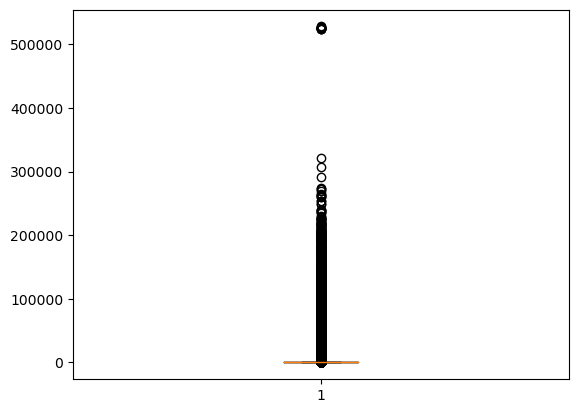

In [8]:
plt.boxplot(df['stm_fh_duur'].dropna())

In [29]:
df[['stm_fh_ddt', 'stm_sap_storeind_ddt']].sample(20)

,stm_fh_ddt,stm_sap_storeind_ddt
494850,25/09/2012 02:59:00,25/09/2012 02:59:00
563550,29/07/2013 11:51:00,31/07/2013 04:04:00
198836,28/07/2018 03:30:00,28/07/2018 20:51:17
321773,11/08/2008 09:30:00,11/08/2008 09:31:00
133802,NaN,NaN
649605,NaN,NaN
687020,24/01/2015 18:45:00,24/01/2015 18:45:00
469363,04/02/2012 13:40:00,04/02/2012 13:41:00
320763,30/07/2008 23:33:00,30/07/2008 23:33:00
26311,NaN,NaN


In [90]:
dt_format = '%d/%m/%Y %H:%M:%S'
duration = []
for i in range(len(df)):
    ddtb = df['stm_sap_meld_ddt'].loc[df.index[i]]
    ddte = df['stm_fh_ddt'].loc[df.index[i]]
    # if type is float it is an nan value
    if type(ddtb) is float or type(ddte) is float:
        duration.append(9000000)
        continue
    dt_o1 = datetime.strptime(ddtb, dt_format)
    dt_o2 = datetime.strptime(ddte, dt_format)
    timedif = dt_o2 - dt_o1
    duration.append(timedif.seconds + timedif.days * (24*60*60))


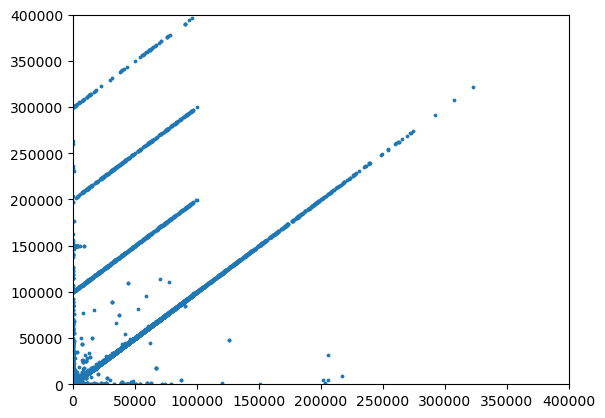

In [103]:
duration2 = (np.array(duration)/60)
plt.scatter(df['stm_fh_duur'], duration2, s=3)
x = np.arange(0, 400000)
# plt.plot(x, x, color='red')
plt.xlim(-1, 400000)
plt.ylim(-1, 400000)
plt.show()

In [84]:
max(duration)

5995783500

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e05323390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e0538a090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e0c227650>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e05395090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e05396210>],
 'means': []}

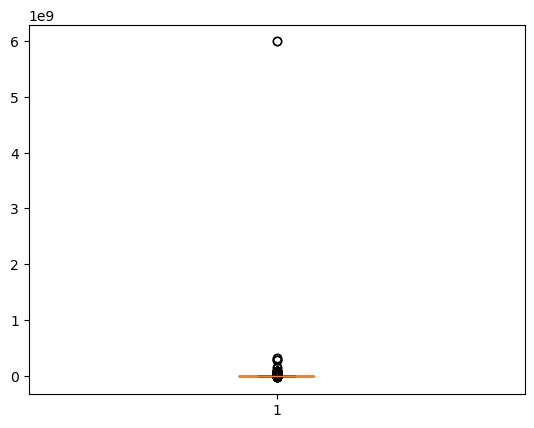

In [82]:
dt_format = '%d/%m/%Y %H:%M:%S'
duration = []
for i in range(len(df)):
    ddtb = df['stm_fh_ddt'].loc[df.index[i]]
    ddte = df['stm_sap_storeind_ddt'].loc[df.index[i]]
    # if type is float it is an nan value
    if type(ddtb) is float or type(ddte) is float:
        duration.append(0)
        continue
    dt_o1 = datetime.strptime(ddtb, dt_format)
    dt_o2 = datetime.strptime(ddte, dt_format)
    timedif = dt_o2 - dt_o1
    duration.append(timedif.seconds + timedif.days * (24*60*60))
# x = np.arange(0, len(duration))
# plt.scatter(x, duration)
# plt.show()
plt.boxplot(duration)

In [83]:
np.quantile(duration, [0.25,0.5,0.75])

array([   0.,   60., 1620.])

In [35]:
type(df['stm_sap_meld_ddt'].loc[df.index[2]])

str

In [26]:
test_dt1 = '02/01/2006 09:00:00'
test_dt2 = '02/02/2010 08:00:10'
dt_format = '%d/%m/%Y %H:%M:%S'
dt_o1 = datetime.strptime(test_dt1, dt_format)
dt_o2 = datetime.strptime(test_dt2, dt_format)
timedif = dt_o2 - dt_o1
timedifsec = timedif.seconds + timedif.days * (24*60*60)
timedifsec

128905210

In [ ]:
df['time_diff'] = df[''] - df['stm_sap_meld_ddt']

In [68]:
type(df['stm_sap_meld_ddt'][0])

float

In [50]:
for column in df.columns:
    count = df[f'{column}'].isna().sum()
    print(f"{column}: {count}")

#stm_sap_meldnr: 0
stm_mon_nr: 1
stm_vl_post: 588027
stm_sap_meld_ddt: 1
stm_sap_meldtekst_lang: 140
stm_sap_meldtekst: 199
stm_geo_mld: 11833
stm_geo_mld_uit_functiepl: 13600
stm_equipm_nr_mld: 237400
stm_equipm_soort_mld: 237403
stm_equipm_omschr_mld: 237408
stm_km_van_mld: 4
stm_km_tot_mld: 4
stm_prioriteit: 161
stm_status_melding_sap: 4
stm_aanngeb_ddt: 33564
stm_oh_pg_gst: 189
stm_geo_gst: 156202
stm_geo_gst_uit_functiepl: 156958
stm_equipm_nr_gst: 292805
stm_equipm_soort_gst: 292815
stm_equipm_omschr_gst: 292816
stm_km_van_gst: 5
stm_km_tot_gst: 5
stm_oorz_groep: 53430
stm_oorz_code: 53413
stm_oorz_tkst: 102475
stm_fh_ddt: 165635
stm_fh_status: 151208
stm_sap_storeind_ddt: 237431
stm_tao_indicator: 1318
stm_tao_indicator_vorige: 568685
stm_tao_soort_mutatie: 644026
stm_tao_telling_mutatie: 0
stm_tao_beinvloedbaar_indicator: 0
stm_evb: 38
stm_sap_melddatum: 38
stm_sap_meldtijd: 38
stm_contractgeb_mld: 237509
stm_functiepl_mld: 11867
stm_techn_mld: 234127
stm_contractgeb_gst: 223
s

In [61]:
# df[(df['stm_fh_duur'] == 0)].count()
len(df['stm_fh_duur'].loc[(df['stm_fh_duur'] == 0) | (df['stm_fh_duur'].isna())])

171751

In [66]:
dt_format = '%d/%m/%Y %H:%M:%S'
ddtb = df['stm_sap_meld_ddt'].loc[df.index[150000]]
ddte = df['stm_fh_ddt'].loc[df.index[200000]]
dt_o1 = datetime.strptime(ddtb, dt_format)
dt_o2 = datetime.strptime(ddte, dt_format)
print(dt_o2 - dt_o1)
dt_o2 - dt_o1

582 days, 11:44:01


datetime.timedelta(days=582, seconds=42241)

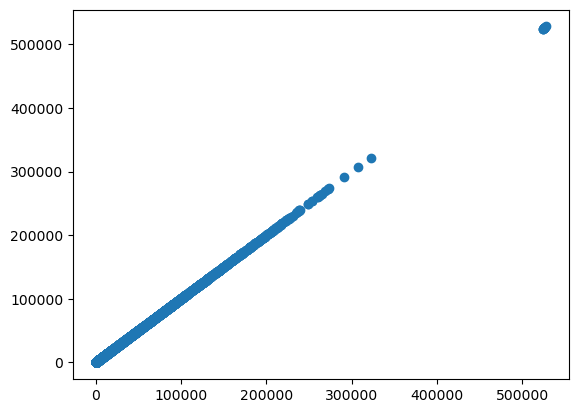

In [12]:
plt.scatter(df['stm_fh_duur'], df['stm_fh_duur'])